### 1. 숫자 손글씨 인식기 만들기 (Sequential Model)

#### 딥러닝 : 데이터 준비 -> 딥러닝 네트워크 설계 -> 학습 -> 테스트(평가)

In [1]:
#input

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.2.0
60000


### 1) 손글씨 이미지 출력

- MNIST 데이터셋의 X항목(위 코드에서는 xtrain, xtest)은 이미지 데이터를 담은 행렬(matrix)

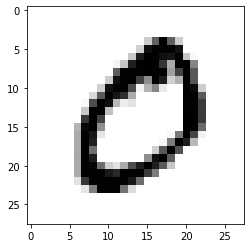

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

# cmap : color map


In [3]:
print(y_train[1])

0


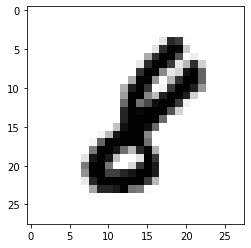

10002 번째 이미지의 숫자는 바로 8 입니다.


In [5]:
index = 10001
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()
print((index+1), '번째 이미지의 숫자는 바로', y_train[index], '입니다.')

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# mnist.load() 함수 통해 학습용 데이터 (x_train, y_train)와 시험용 데이터 (x_test, y_test) 나누어 받아들임


In [7]:
# 학습용 데이터는 몇 장인가?

print(x_train.shape)

(60000, 28, 28)


In [9]:
# 시험용 데이터는 몇 장인가?

print(x_test.shape)

(10000, 28, 28)


### 데이터셋
1) 훈련셋

2) 검증셋
    - 머신러닝 학습 과정이 정상적으로 진행되고 있는지, 오버피팅이 발생하고 있지 않은지, 학습을 중단해도 되는지 등을 확인하고 싶을 때 사용한다.
    - 검증셋으로 가장 높은 평가를 받은 방법이 최적의 학습 방법. 이 때 학습 방법을 결정하는 파라미터를 하이퍼파라미터라고 한다.
    
3) 시험셋

### 교차 검증

과적합을 해결하기 위한 방법으로 교차 검증을 사용할 수 있다. 과적합은 test set이 고정되어 있기 때문에 발생한다. 교차 검증은 데이터의 모든 부분을 사용하여 모델을 검증하고, test set을 하나로 고정하지 않는다.
모든 데이터 셋을 평가에 활용하여 데이터 편중을 막을 수 있다. 이를 통해 오버 피팅을 막을 수 있다. 또한 데이터 부족으로 인한 언더피팅을 방지할 수 있다. 그러나 모델 훈련 및 평가 시간이 오래 걸린다는 단점이 있다. 

- k겹 교차 검증: 데이터를 k개의 데이터 폴드로 분할하고, 각 iteration 마다 tst set을 다르게 할당하여 총 k개의 데이터 폴드 세트를 구성한다. 따라서 모델을 학습 및 훈련하는데 총 k번의 iteration이 필요하다. 각 데이터 폴드 세트에서 나온 검증 결과들의 평균이 최종적인 검증 결과이다.

### 2) 데이터 전처리

인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0 ~ 1 사이의 값으로 정규화 시켜주는 것이 좋다. MNIST 데이터는 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255.0 으로 나누어주면 된다.
다음 출력을 통해 최소값이 0, 최대값이 1에 근접하도록 나오는지 확인할 수 있다.

In [11]:
# 실제 픽셀값 확인

print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [13]:
# 정규화 최소값, 최대값 확인

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0
